In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score

In [3]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")
datos[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
X=datos.drop(["quality"],axis=1).values
y=datos["quality"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=397)
X_test.shape

(320, 11)

Normalización de los datos

In [8]:
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

Entrenamiento y desempeño del modelo

In [6]:
mlp= MLPClassifier(hidden_layer_sizes=(4),activation="tanh",max_iter=500)
mlp.fit(X_train_scaled,y_train)

predict= mlp.predict(X_test_scaled)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[  0   0   1   0   0   0]
 [  0   0   3   1   0   0]
 [  0   1 108  35   1   0]
 [  0   0  51  66   4   0]
 [  0   0   4  26  16   0]
 [  0   0   0   2   1   0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         4
          5       0.65      0.74      0.69       145
          6       0.51      0.55      0.53       121
          7       0.73      0.35      0.47        46
          8       0.00      0.00      0.00         3

avg / total       0.59      0.59      0.58       320



C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


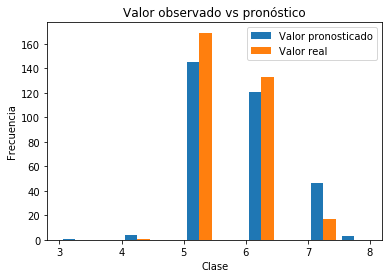

In [11]:
plt.hist([y_test,predict],label=["Valor pronosticado","Valor real"])
plt.title("Valor observado vs pronóstico")
plt.ylabel('Frecuencia')
plt.xlabel("Clase")
plt.legend(loc=0)
plt.savefig("Error_RN")
plt.show()

Pesos sinápticos y umbrales de activación

In [9]:
pesos=mlp.coefs_
umbrales=mlp.intercepts_

#Capa de entrada - capa oculta
a=[]
for i in range (11):
    for j in range (4):
        a.append([i+1,j+1,pesos[0][i][j]])
        
Pesos1=pd.DataFrame(a,columns=["Neurona de entrada","Neurona oculta","Peso sináptico"])

# Capa oculta - Capa de salida
b=[]
for i in range(4):
    for j in range(6):
        b.append([i+1,j+3,pesos[1][i][j]])
Pesos2=pd.DataFrame(b,columns=["Neurona oculta","Neurona de salida","Peso sináptico"])

print("Pesos sinápticos entre la capa de entrada y la oculta (neurona 1): ")
print(Pesos1[:4])
print()
print("Pesos sinápticos entre la capa oculta y la capa de salida (para una neurona oculta):")
print(Pesos2[:6])

Pesos sinápticos entre la capa de entrada y la oculta (neurona 1): 
   Neurona de entrada  Neurona oculta  Peso sináptico
0                   1               1        0.338812
1                   1               2        0.066830
2                   1               3       -0.435302
3                   1               4       -0.540399

Pesos sinápticos entre la capa oculta y la capa de salida (para una neurona oculta):
   Neurona oculta  Neurona de salida  Peso sináptico
0               1                  3        1.367139
1               1                  4        1.523982
2               1                  5        0.633432
3               1                  6       -0.619900
4               1                  7       -0.892271
5               1                  8        1.601952


In [10]:
# Umbrales a las neuronas ocultas
c=[]
for i in range (1):
    for j in range (4):
        c.append([i,j+1,umbrales[0][j]])
        
Umbrales1=pd.DataFrame(c,columns=["Umbral","Neurona oculta","Peso sináptico"])

print("Umbrales 1:")
print(Umbrales1)

# Umbrales a las neuronas de salida

d=[]
for i in range (1):
    for j in range (6):
        d.append([i+1,j+3,umbrales[1][j]])
        
Umbrales2=pd.DataFrame(d,columns=["Umbral","Neurona de salida","Peso sináptico"])
print()
print("Umbrales 2:")
print(Umbrales2)

Umbrales 1:
   Umbral  Neurona oculta  Peso sináptico
0       0               1       -1.286863
1       0               2        1.398622
2       0               3       -0.475363
3       0               4        0.480304

Umbrales 2:
   Umbral  Neurona de salida  Peso sináptico
0       1                  3       -1.606244
1       1                  4       -0.224499
2       1                  5        0.093092
3       1                  6        0.102764
4       1                  7       -1.291440
5       1                  8       -0.606282
